In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import urllib2
from pyproj import Proj, transform
import xmltodict
import mechanize
import sys
import platform
import datetime
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
%matplotlib inline

In [2]:
print("Operating System " + platform.system() + " " + platform.release())
print("Python Version " + str(sys.version))
print("Pandas Version " + str(pd.__version__))
print("Numpy Version " + str(np.__version__))
print("Matplotlib Version " + str(matplotlib.__version__))

Operating System Linux 3.19.0-43-generic
Python Version 2.7.6 (default, Jun 22 2015, 17:58:13) 
[GCC 4.8.2]
Pandas Version 0.17.1
Numpy Version 1.10.4
Matplotlib Version 1.5.0


In [2]:
import wellapplication

In [3]:
import wellapplication.chem as wc

In [4]:
wellapplication.__version__

'0.2.4'

# Import and Standardize Data

In [9]:
#rootname = "/media/p/Transcend/PROJECTS/UMAR/Data/chem/" #thumb on ubuntu
rootname = "E:\\PROJECTS\\UMAR\\Data\\chem\\" #thumb on windows

In [10]:
WQPResultsFile = rootname + "result.csv"
WQPStationFile = rootname + "station.csv"
SDWISFile = rootname + "SDWIS_Cache.txt"
AGStationsFile = rootname + "AG_Stations_Cache.csv"
AGResultsFile = rootname + "AG_byparam.csv"
UGSFile = rootname + "UGS_Cache.txt"
STORLegStatFile = rootname + "UT_Cache_sta_001.txt"
STORLegResFile = rootname + "UT_Cache_res_001.txt"
STORParamFile = rootname + "parameter.txt"

In [11]:
fielddata = rootname + "FieldData.xlsx"
statelabresults0 = rootname + "utgs1402.txt"
statelabresults1 = rootname + "utgs1403.txt"
statelabresults2 = rootname + "utgs1501.txt"
statelabstations = rootname + "UtahStateLabStations.xlsx"

In [12]:
df = wc.WQP.WQPimportRes(WQPResultsFile)
df = wc.WQP.WQPmassageResults(df)

## WQP

The following html addresses are REST-based queries to download WQP data from the <a href="http://www.waterqualitydata.us/portal/">WQP portal</a>. If you click on them, they will produce zipped csv files that can be opened and processed with the code below. Originally, the code directly applied these links, but the files are large and take a lot of time to download.

Station data address:

http://waterqualitydata.us/Station/search?statecode=US%3A49&countycode=US%3A49%3A005&sampleMedia=Water&characteristicType=Information%3BInorganics%2C+Major%2C+Metals%3BInorganics%2C+Major%2C+Non-metals%3BInorganics%2C+Minor%2C+Metals%3BInorganics%2C+Minor%2C+Non-metals%3BNot+Assigned%3BNutrient%3BPhysical%3BStable+Isotopes&mimeType=csv&zip=yes&sorted=no

Result data address:


http://waterqualitydata.us/Result/search?statecode=US%3A49&countycode=US%3A49%3A005&sampleMedia=Water&characteristicType=Information%3BInorganics%2C+Major%2C+Metals%3BInorganics%2C+Major%2C+Non-metals%3BInorganics%2C+Minor%2C+Metals%3BInorganics%2C+Minor%2C+Non-metals%3BNot+Assigned%3BNutrient%3BPhysical%3BStable+Isotopes&mimeType=csv&zip=yes&sorted=no

### WQP Results

Define data type of each field in the WQP database.  This allows for easy import of data.

In [14]:
Rdtypes = {"OrganizationIdentifier":np.str_, "OrganizationFormalName":np.str_, "ActivityIdentifier":np.str_, 
           "ActivityStartTime/Time":np.str_,
           "ActivityTypeCode":np.str_, "ActivityMediaName":np.str_, "ActivityMediaSubdivisionName":np.str_, 
           "ActivityStartDate":np.str_, "ActivityStartTime/Time":np.str_, "ActivityStartTime/TimeZoneCode":np.str_, 
           "ActivityEndDate":np.str_, "ActivityEndTime/Time":np.str_, "ActivityEndTime/TimeZoneCode":np.str_, 
           "ActivityDepthHeightMeasure/MeasureValue":np.float16, "ActivityDepthHeightMeasure/MeasureUnitCode":np.str_, 
           "ActivityDepthAltitudeReferencePointText":np.str_, "ActivityTopDepthHeightMeasure/MeasureValue":np.float16, 
           "ActivityTopDepthHeightMeasure/MeasureUnitCode":np.str_, 
           "ActivityBottomDepthHeightMeasure/MeasureValue":np.float16, 
           "ActivityBottomDepthHeightMeasure/MeasureUnitCode":np.str_, 
           "ProjectIdentifier":np.str_, "ActivityConductingOrganizationText":np.str_, 
           "MonitoringLocationIdentifier":np.str_, "ActivityCommentText":np.str_, 
           "SampleAquifer":np.str_, "HydrologicCondition":np.str_, "HydrologicEvent":np.str_, 
           "SampleCollectionMethod/MethodIdentifier":np.str_, "SampleCollectionMethod/MethodIdentifierContext":np.str_, 
           "SampleCollectionMethod/MethodName":np.str_, "SampleCollectionEquipmentName":np.str_, 
           "ResultDetectionConditionText":np.str_, "CharacteristicName":np.str_, "ResultSampleFractionText":np.str_, 
           "ResultMeasureValue":np.str_, "ResultMeasure/MeasureUnitCode":np.str_, "MeasureQualifierCode":np.str_, 
           "ResultStatusIdentifier":np.str_, "StatisticalBaseCode":np.str_, "ResultValueTypeName":np.str_, 
           "ResultWeightBasisText":np.str_, "ResultTimeBasisText":np.str_, "ResultTemperatureBasisText":np.str_, 
           "ResultParticleSizeBasisText":np.str_, "PrecisionValue":np.str_, "ResultCommentText":np.str_, 
           "USGSPCode":np.str_, "ResultDepthHeightMeasure/MeasureValue":np.float16, 
           "ResultDepthHeightMeasure/MeasureUnitCode":np.str_, "ResultDepthAltitudeReferencePointText":np.str_, 
           "SubjectTaxonomicName":np.str_, "SampleTissueAnatomyName":np.str_, 
           "ResultAnalyticalMethod/MethodIdentifier":np.str_, "ResultAnalyticalMethod/MethodIdentifierContext":np.str_, 
           "ResultAnalyticalMethod/MethodName":np.str_, "MethodDescriptionText":np.str_, "LaboratoryName":np.str_, 
           "AnalysisStartDate":np.str_, "ResultLaboratoryCommentText":np.str_, 
           "DetectionQuantitationLimitTypeName":np.str_, "DetectionQuantitationLimitMeasure/MeasureValue":np.str_, 
           "DetectionQuantitationLimitMeasure/MeasureUnitCode":np.str_, "PreparationStartDate":np.str_, 
           "ProviderName":np.str_} 

dt = [6,56,61]

Read csv data into python.

In [15]:
WQP = pd.read_csv(WQPResultsFile, dtype=Rdtypes, parse_dates=dt)

Rename columns to match with other data later.

In [16]:
ResFieldDict = {"AnalysisStartDate":"AnalysisDate", "ResultAnalyticalMethod/MethodIdentifier":"AnalytMeth", 
                "ResultAnalyticalMethod/MethodName":"AnalytMethId", "ResultDetectionConditionText":"DetectCond", 
                "ResultLaboratoryCommentText":"LabComments", "LaboratoryName":"LabName", 
                "DetectionQuantitationLimitTypeName":"LimitType", "DetectionQuantitationLimitMeasure/MeasureValue":"MDL", 
                "DetectionQuantitationLimitMeasure/MeasureUnitCode":"MDLUnit", "MethodDescriptionText":"MethodDescript", 
                "OrganizationIdentifier":"OrgId", "OrganizationFormalName":"OrgName", "CharacteristicName":"Param", 
                "ProjectIdentifier":"ProjectId", "MeasureQualifierCode":"QualCode", "ResultCommentText":"ResultComment", 
                "ResultStatusIdentifier":"ResultStatus", "ResultMeasureValue":"ResultValue", 
                "ActivityCommentText":"SampComment", "ActivityDepthHeightMeasure/MeasureValue":"SampDepth", 
                "ActivityDepthAltitudeReferencePointText":"SampDepthRef", 
                "ActivityDepthHeightMeasure/MeasureUnitCode":"SampDepthU", "SampleCollectionEquipmentName":"SampEquip", 
                "ResultSampleFractionText":"SampFrac", "ActivityStartDate":"SampleDate", "ActivityIdentifier":"SampleId", 
                "ActivityStartTime/Time":"SampleTime", "ActivityMediaSubdivisionName":"SampMedia", 
                "SampleCollectionMethod/MethodIdentifier":"SampMeth", "SampleCollectionMethod/MethodName":"SampMethName", 
                "ActivityTypeCode":"SampType", "MonitoringLocationIdentifier":"StationId", 
                "ResultMeasure/MeasureUnitCode":"Unit", "USGSPCode":"USGSPCode",
                "ActivityStartDate":"StartDate","ActivityStartTime/Time":"StartTime"} 

In [17]:
WQP.rename(columns=ResFieldDict,inplace=True)

Define unneeded columns that will be dropped to save memory.

In [18]:
resdroplist = ["ActivityBottomDepthHeightMeasure/MeasureUnitCode", "ActivityBottomDepthHeightMeasure/MeasureValue", 
               "ActivityConductingOrganizationText", "ActivityEndDate", "ActivityEndTime/Time", 
               "ActivityEndTime/TimeZoneCode", "ActivityMediaName", "ActivityStartTime/TimeZoneCode", 
               "ActivityTopDepthHeightMeasure/MeasureUnitCode", "ActivityTopDepthHeightMeasure/MeasureValue", 
               "HydrologicCondition", "HydrologicEvent", "PrecisionValue", "PreparationStartDate", "ProviderName", 
               "ResultAnalyticalMethod/MethodIdentifierContext", "ResultDepthAltitudeReferencePointText", 
               "ResultDepthHeightMeasure/MeasureUnitCode", "ResultDepthHeightMeasure/MeasureValue", 
               "ResultParticleSizeBasisText", "ResultTemperatureBasisText", 
               "ResultTimeBasisText", "ResultValueTypeName", "ResultWeightBasisText", "SampleAquifer", 
               "SampleCollectionMethod/MethodIdentifierContext", "SampleTissueAnatomyName", "StatisticalBaseCode", 
               "SubjectTaxonomicName","StartTime","StartDate","StartTime","StartDate"] 

Define a function to fix funky dates found in the WQP database.  This includes impossible dates or dates with too many numbers.

In [19]:
def datetimefix(x,format):
    '''
    This script cleans date-time errors
    
    input
    x = date-time string
    format = format of date-time string
    
    output 
    formatted datetime type
    '''
    d = str(x[0]).lstrip().rstrip()[0:10]
    t = str(x[1]).lstrip().rstrip()[0:5].zfill(5)
    try:
        int(d[0:2])
    except(ValueError,TypeError,NameError):
        return np.nan
    try:
        int(t[0:2])
        int(t[3:5])
    except(ValueError,TypeError,NameError):
        t = "00:00"
   
    if int(t[0:2])>23:
        t = "00:00"
    elif int(t[3:5])>59:
        t = "00:00"
    else:
        t = t[0:2].zfill(2) + ":" + t[3:5]
    return datetime.datetime.strptime(d + " " + t, format)
    

In [20]:
WQP["SampleDate"] = WQP[["StartDate","StartTime"]].apply(lambda x: datetimefix(x,"%Y-%m-%d %H:%M"),1)

Drop unwanted fields

In [21]:
WQP.drop(resdroplist,inplace=True,axis=1)

Convert result values and the MDL values to numeric fields from string fields.

In [22]:
WQP['ResultValue'] = WQP['ResultValue'].convert_objects(convert_numeric=True)
WQP['MDL'] = WQP['MDL'].convert_objects(convert_numeric=True)

c:\python27\arcgis10.3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
c:\python27\arcgis10.3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Remove station duplicates by removing the preceding 'WQX' found in the station id field.

In [23]:
WQP['StationId'] = WQP['StationId'].str.replace('_WQX-','-')

Standardize all ug/l data to mg/l by changing out the unit descriptor and dividing by 1000.

In [24]:
#standardize all ug/l data to mg/l
def unitfix(x):
    z = str(x).lower()
    if z == "ug/l":
        return "mg/l"
    elif z == "mg/l":
        return "mg/l"
    else:
        return x

WQP.Unit = WQP.Unit.apply(lambda x: str(x).rstrip(), 1)
WQP.ResultValue = WQP[["ResultValue","Unit"]].apply(lambda x: x[0]/1000 if str(x[1]).lower()=="ug/l" else x[0], 1)
WQP.Unit = WQP.Unit.apply(lambda x: unitfix(x),1)

Normalize common nutrients so that they are all in the same type of units.  For example, sometimes nitrate is reported "as nitrogen" and sometimes it is reported "as nitrate".  The difference between the two types of reporting is a factor of 4.427!

In [25]:
def parnorm(x):
    p = str(x[0]).rstrip().lstrip().lower()
    u = str(x[2]).rstrip().lstrip().lower()
    if p == 'nitrate' and u == 'mg/l as n':
        return 'Nitrate', x[1]*4.427, 'mg/l'
    elif p == 'nitrite' and u == 'mg/l as n':
        return 'Nitrite', x[1]*3.285, 'mg/l'
    elif p == 'ammonia-nitrogen' or p == 'ammonia-nitrogen as n' or p == 'ammonia and ammonium':
        return 'Ammonium', x[1]*1.288, 'mg/l'
    elif p == 'ammonium' and u == 'mg/l as n':
        return 'Ammonium', x[1]*1.288, 'mg/l'
    elif p == 'sulfate as s':
        return 'Sulfate', x[1]*2.996, 'mg/l'
    elif p in ('phosphate-phosphorus', 'phosphate-phosphorus as p','orthophosphate as p'):
        return 'Phosphate', x[1]*3.066, 'mg/l'
    elif (p == 'phosphate' or p == 'orthophosphate') and u == 'mg/l as p':
        return 'Phosphate', x[1]*3.066, 'mg/l'
    elif u == 'ug/l':
        return x[0], x[1]/1000, 'mg/l'
    else:
        return x[0], x[1], str(x[2]).rstrip()

WQP['Param'], WQP['ResultValue'], WQP['Unit'] = zip(*WQP[['Param','ResultValue','Unit']].apply(lambda x: parnorm(x),1))

### WQP Stations

Read in WQP station data.

In [26]:
WQPStat = pd.read_csv(WQPStationFile)

Rename and simplify station data column names for later compilation.

In [27]:
StatFieldDict = {"MonitoringLocationIdentifier":"StationId", "AquiferName":"Aquifer", "AquiferTypeName":"AquiferType", 
             "ConstructionDateText":"ConstDate", "CountyCode":"CountyCode", "WellDepthMeasure/MeasureValue":"Depth", 
             "WellDepthMeasure/MeasureUnitCode":"DepthUnit", "VerticalMeasure/MeasureValue":"Elev", 
             "VerticalAccuracyMeasure/MeasureValue":"ElevAcc", "VerticalAccuracyMeasure/MeasureUnitCode":"ElevAccUnit", 
             "VerticalCollectionMethodName":"ElevMeth", "VerticalCoordinateReferenceSystemDatumName":"ElevRef", 
             "VerticalMeasure/MeasureUnitCode":"ElevUnit", "FormationTypeText":"FmType", 
             "WellHoleDepthMeasure/MeasureValue":"HoleDepth", "WellHoleDepthMeasure/MeasureUnitCode":"HoleDUnit", 
             "HorizontalAccuracyMeasure/MeasureValue":"HorAcc", "HorizontalAccuracyMeasure/MeasureUnitCode":"HorAccUnit", 
             "HorizontalCollectionMethodName":"HorCollMeth", "HorizontalCoordinateReferenceSystemDatumName":"HorRef", 
             "HUCEightDigitCode":"HUC8", "LatitudeMeasure":"Lat_Y", "LongitudeMeasure":"Lon_X", 
             "OrganizationIdentifier":"OrgId", "OrganizationFormalName":"OrgName", "StateCode":"StateCode", 
             "MonitoringLocationDescriptionText":"StationComment", "MonitoringLocationName":"StationName", 
             "MonitoringLocationTypeName":"StationType"} 

In [28]:
WQPStat.rename(columns=StatFieldDict,inplace=True)

Define the fields to drop to save memory.

In [29]:
statdroplist = ["ContributingDrainageAreaMeasure/MeasureUnitCode", "ContributingDrainageAreaMeasure/MeasureValue", 
                "DrainageAreaMeasure/MeasureUnitCode", "DrainageAreaMeasure/MeasureValue", "CountryCode", "ProviderName", 
                "SourceMapScaleNumeric"]
WQPStat.drop(statdroplist,inplace=True,axis=1)

Make station types in the `StationType` field consistent for easier summary and compilation later on.

In [30]:
TypeDict = {"Stream: Canal":"Stream", "River/Stream":"Stream", 
            "Stream: Canal":"Stream", "Well: Test hole not completed as a well":"Well"}
WQPStat.StationType = WQPStat["StationType"].apply(lambda x: TypeDict.get(x,x),1)
WQPStat.Elev = WQPStat.Elev.apply(lambda x: np.nan if x==0.0 else round(x,1), 1)

Remove preceding `WQX` from `StationId` field to remove duplicate station data created by legacy database.

In [31]:
WQPStat['StationId'] = WQPStat['StationId'].str.replace('_WQX-','-')
WQPStat.drop_duplicates(subset=['StationId'],inplace=True)

## SDWIS

SDWIS data were extracted from the Utah SDWIS database into ArcGIS 10.3.2 using the following SQL query.  NED 10m elevation and UTM coordinates were appended using ArcGIS.

```SQL
SELECT UTV80.TINWSF.EXTERNAL_SYS_NUM AS "FED_NM",  UTV80.TINWSF.ST_ASGN_IDENT_CD AS "ST_ID",  UTV80.TINWSF.TYPE_CODE,  UTV80.TINWSYS.NAME AS "SYS_NM", UTV80.TINWSYS.D_PRIN_CNTY_SVD_NM AS "COUNTY", UTV80.TINWSF.NAME AS "FAC_NM",  UTV80.TINWSF.TINWSYS_IS_NUMBER AS "SY_NBR", UTV80.TINLOC.LATITUDE_MEASURE AS "Y",  UTV80.TINLOC.LONGITUDE_MEASURE AS "X",  UTV80.TINLOC.VERTICAL_MEASURE AS "Z", UTV80.TSASAMPL.COLLLECTION_END_DT AS "DTE", UTV80.TSAANLYT.NAME AS "ANLY_NM",  UTV80.TSASAR.CONCENTRATION_MSR AS "CONC_MSR", UTV80.TSASAR.TSASAR_IS_NUMBER AS "ID_NUM",  UTV80.TSASAR.UOM_CODE,   UTV80.TSASAR.DETECTN_LIMIT_NUM AS "DET_LIM", UTV80.TSASAR.DETECTN_LIM_UOM_CD AS "DET_UOM"  FROM  UTV80.TINWSF  INNER JOIN  UTV80.TINWSYS ON UTV80.TINWSF.TINWSYS_IS_NUMBER = UTV80.TINWSYS.TINWSYS_IS_NUMBER  INNER JOIN  UTV80.TINLOC ON UTV80.TINWSF.TINWSF_IS_NUMBER = UTV80.TINLOC.TINWSF_IS_NUMBER  INNER JOIN  UTV80.TSASMPPT ON UTV80.TINWSF.TINWSF_IS_NUMBER = UTV80.TSASMPPT.TINWSF0IS_NUMBER  INNER JOIN  UTV80.TSASAMPL ON UTV80.TSASMPPT.TSASMPPT_IS_NUMBER = UTV80.TSASAMPL.TSASMPPT_IS_NUMBER  INNER JOIN  UTV80.TSASAR ON UTV80.TSASAMPL.TSASAMPL_IS_NUMBER = UTV80.TSASAR.TSASAMPL_IS_NUMBER  INNER JOIN  UTV80.TSAANLYT ON UTV80.TSASAR.TSAANLYT_IS_NUMBER = UTV80.TSAANLYT.TSAANLYT_IS_NUMBER WHERE  (UTV80.TINWSYS.D_PRIN_CNTY_SVD_NM LIKE '%CACHE COUNTY%')   AND (UTV80.TSAANLYT.NAME LIKE '%NITRATE%' OR UTV80.TSAANLYT.NAME LIKE '%NITRITE%' OR UTV80.TSAANLYT.NAME LIKE '%AMMONI%' OR UTV80.TSAANLYT.NAME LIKE '%SULFATE%' OR UTV80.TSAANLYT.NAME LIKE '%TDS%' OR UTV80.TSAANLYT.NAME LIKE '%SODIUM%' OR UTV80.TSAANLYT.NAME LIKE '%FLUORIDE%' OR UTV80.TSAANLYT.NAME LIKE '%MAGNESIUM%' OR UTV80.TSAANLYT.NAME LIKE '%SELENIUM%' OR  UTV80.TSAANLYT.NAME LIKE '%CALCIUM%' OR UTV80.TSAANLYT.NAME LIKE '%CHLORIDE%' OR UTV80.TSAANLYT.NAME LIKE '%POTASSIUM%' OR UTV80.TSAANLYT.NAME LIKE '%SELENIUM%' OR UTV80.TSAANLYT.NAME LIKE '%SILICA%' OR UTV80.TSAANLYT.NAME LIKE '%IRON %' OR UTV80.TSAANLYT.NAME LIKE '%ALKA %' OR UTV80.TSAANLYT.NAME LIKE '%CONDUCTIVITY%' OR UTV80.TSAANLYT.NAME LIKE '%PH %' OR UTV80.TSAANLYT.NAME LIKE '%TEMP%' OR UTV80.TSAANLYT.NAME LIKE '%ARSENIC%' OR UTV80.TSAANLYT.NAME LIKE '%CARBON%' OR UTV80.TSAANLYT.NAME LIKE '%TRITIUM%' OR UTV80.TSAANLYT.NAME LIKE '%COPPER%' OR UTV80.TSAANLYT.NAME LIKE '%LEAD%' OR UTV80.TSAANLYT.NAME LIKE '%NITROGEN%' OR UTV80.TSAANLYT.NAME LIKE '%PHOSPHATE%' OR UTV80.TSAANLYT.NAME LIKE '%TDS%' OR UTV80.TSAANLYT.NAME LIKE '%ZINC%' OR UTV80.TSAANLYT.NAME LIKE '%IRON%' OR UTV80.TSAANLYT.NAME LIKE '%CHROMIUM%' ) ORDER BY UTV80.TINWSF.ST_ASGN_IDENT_CD
```

```SQL
SELECT UTV80.TINWSF.EXTERNAL_SYS_NUM AS "FED_NM",  UTV80.TINWSF.ST_ASGN_IDENT_CD AS "ST_ID",  UTV80.TINWSF.TYPE_CODE,  UTV80.TINWSYS.NAME AS "SYS_NM", UTV80.TINWSYS.D_PRIN_CNTY_SVD_NM AS "COUNTY", UTV80.TINWSF.NAME AS "FAC_NM",  UTV80.TINWSF.TINWSYS_IS_NUMBER AS "SY_NBR", UTV80.TINLOC.LATITUDE_MEASURE AS "Y",  UTV80.TINLOC.LONGITUDE_MEASURE AS "X",  UTV80.TINLOC.VERTICAL_MEASURE AS "Z", UTV80.TSASAMPL.COLLLECTION_END_DT AS "DTE", UTV80.TSAANLYT.NAME AS "ANLY_NM",  UTV80.TSASAR.CONCENTRATION_MSR AS "CONC_MSR", UTV80.TSASAR.TSASAR_IS_NUMBER AS "ID_NUM",  UTV80.TSASAR.UOM_CODE,   UTV80.TSASAR.DETECTN_LIMIT_NUM AS "DET_LIM", UTV80.TSASAR.DETECTN_LIM_UOM_CD AS "DET_UOM"  FROM  UTV80.TINWSF  INNER JOIN  UTV80.TINWSYS ON UTV80.TINWSF.TINWSYS_IS_NUMBER = UTV80.TINWSYS.TINWSYS_IS_NUMBER  INNER JOIN  UTV80.TINLOC ON UTV80.TINWSF.TINWSF_IS_NUMBER = UTV80.TINLOC.TINWSF_IS_NUMBER  INNER JOIN  UTV80.TSASMPPT ON UTV80.TINWSF.TINWSF_IS_NUMBER = UTV80.TSASMPPT.TINWSF0IS_NUMBER  INNER JOIN  UTV80.TSASAMPL ON UTV80.TSASMPPT.TSASMPPT_IS_NUMBER = UTV80.TSASAMPL.TSASMPPT_IS_NUMBER  INNER JOIN  UTV80.TSASAR ON UTV80.TSASAMPL.TSASAMPL_IS_NUMBER = UTV80.TSASAR.TSASAMPL_IS_NUMBER  INNER JOIN  UTV80.TSAANLYT ON UTV80.TSASAR.TSAANLYT_IS_NUMBER = UTV80.TSAANLYT.TSAANLYT_IS_NUMBER WHERE  UTV80.TINWSYS.D_PRIN_CNTY_SVD_NM LIKE '%CACHE COUNTY%' AND (UTV80.TINWSYS.NAME IN('%PROVID%','%MILL%','%LOG%','%NIB%',   ORDER BY UTV80.TINWSF.ST_ASGN_IDENT_CD
```

Read in the queried SDWIS data and make a `StationId` and `StationName` field.  Make field names consistent with those applied to WQP data above so that compilation is easier later.

In [32]:
SDWIS = pd.read_csv(SDWISFile)

def sampid(x):
    return "SDWIS" + str(x[0]) + str(x[1]) + str(x[2])[:-7]

def statid(x):
    return "SDWIS" + str(x[0]) + str(x[1]) 

def statnm(x):
    return str(str(x[0]) + " " + str(x[1])).title()

SDWIS["StationId"] = SDWIS[["FED_NM","ST_ID"]].apply(lambda x: statid(x),1)
SDWIS["StationName"] = SDWIS[["SYS_NM","FAC_NM"]].apply(lambda x: statnm(x),1)
SDWIS["SampleId"] = SDWIS[["FED_NM","ST_ID","DTE"]].apply(lambda x: sampid(x),1)
SDWIS["OrgId"] = "UDDW"
SDWIS["OrgName"] = "Utah Division of Drinking Water"
SDWIS["Elev"] = SDWIS["Z"].apply(lambda x: round(x*3.2808,1),1)
SDWIS["Unit"] = SDWIS["UOM_CODE"].apply(lambda x: str(x).lower(),1)
SDWIS["MDLUnit"] = SDWIS["DET_UOM"].apply(lambda x: str(x).lower(),1)
SDWIS["Param"] = SDWIS["ANLY_NM"].apply(lambda x: str(x).title().rstrip(),1)

In [33]:
SDWISFields ={"DTE":"SampleDate", "TYPE_CODE":"StationType",
              "CONC_MSR":"ResultValue", "DET_LIM":"MDL",
              "Y":"Lat_Y", "X":"Lon_X"}  
SDWIS.rename(columns=SDWISFields,inplace=True)

In [34]:
def datetimefixSDWIS(x,format):
    d = str(x).lstrip().rstrip()
    try:
        return datetime.datetime.strptime(d, "%m/%d/%Y %H:%M:%S")
    except(ValueError):
        return datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S")

SDWIS["SampleDate"] = SDWIS["SampleDate"].apply(lambda x: datetimefixSDWIS(x,"%m/%d/%Y %H:%M:%S"),1)

Normalize units and nutrient data so that they are consistent with the WQP data. This includes standardizing ug/l to mg/l

In [35]:
print sorted(list(SDWIS.Param.unique()))

def parnormSDWIS(x):
    p = str(x[0]).rstrip().lstrip().lower()
    u = str(x[2]).rstrip().lstrip().lower()
    if p == 'nitrate':
        return 'Nitrate', x[1]*4.427, 'mg/l'
    elif p == 'nitrite':
        return 'Nitrite', x[1]*3.285, 'mg/l'
    elif p == 'nitrogen-ammonia as (n)':
        return 'Ammonium', x[1]*1.288, 'mg/l'
    elif u == 'ug/l':
        return x[0], x[1]/1000, 'mg/l'
    else:
        return x[0], x[1], str(x[2]).rstrip()
    
SDWIS['Param'], SDWIS['ResultValue'], SDWIS['Unit'] = zip(*SDWIS[['Param','ResultValue','Unit']].apply(lambda x: parnormSDWIS(x),1))

['Alkalinity, Carbonate', 'Arsenic', 'Bicarbonate As Hco3', 'Calcium', 'Carbon Dioxide', 'Carbon Tetrachloride', 'Carbon, Total', 'Chloride', 'Chromium', 'Chromium, Hex', 'Conductivity @ 25 C Umhos/Cm', 'Copper, Free', 'Fluoride', 'Hardness, Carbonate', 'Hydroxide As Calcium Carbonate', 'Iron', 'Iron, Dissolved', 'Lead', 'Magnesium', 'Nitrate', 'Nitrate-Nitrite', 'Nitrite', 'Nitrogen-Ammonia As (N)', 'Orthophosphate', 'Ph', 'Phosphate, Total', 'Potassium', 'Selenium', 'Silica', 'Sodium', 'Sulfate', 'Tds', 'Tritium', 'Vinyl Chloride', 'Zinc']


Drop unneeded SDWIS fields to save memory and reduce confusion.

In [36]:
SDWIS.drop(["FED_NM", "DET_UOM", "UOM_CODE","ANLY_NM", "FAC_NM", "ST_ID", 
            "SYS_NM", "COUNTY", "SY_NBR", "Z", "ID_NUM"],inplace=True, axis=1)

Rename chemical parameters in the SDWIS `Param` field to match those of the WQP data.

In [37]:
SDWISPmatch = {"Ph":"pH","Tds":"TDS","Nitrogen-Ammonia As (N)":"Nitrogen-Ammonia as (N)",
              "Hydroxide As Calcium Carbonate":"Hydroxide as Calcium Carbonate",
               "Bicarbonate As Hco3":"Bicarbonate as HCO3"}
SDWIS["Param"] = SDWIS["Param"].apply(lambda x: SDWISPmatch.get(x,x))
SDWIS["StationName"] = SDWIS["StationName"].apply(lambda x: x.replace("Wtp","WTP"))

SDWIS["ResultValue"] = SDWIS[["ResultValue","Unit"]].apply(lambda x: x[0]/1000 if x[1]=="ug/L" else x[0], 1)

Make station types consistent with the WQP data.

In [38]:
SDWISType = {"SP":"Spring","WL":"Well","TP":"Facility Other","IN":"Stream","CC":"Connection","WH":"Well"}
SDWIS.StationType = SDWIS.StationType.apply(lambda x: SDWISType.get(x,x),1)

SDWIS facility type code (FacTypeCode): CC, Consecutive_connection;
CH, Common_headers; CS, Cistern; CW, Clear_well;
DS, Distribution_system_zone; IG, Infiltration_gallery; IN,
Intake; NP, Non-piped; OT, Other; PC, Pressure_control;
PF, Pump_facility; RC, Roof_catchment; RS, Reservoir; SI,
Surface_impoundment; SP, Spring; SS, Sampling_station; ST,
Storage; TM, Transmission_main; TP, Treatment_plant; WH,
Well_head; WL, Well.

Create a SDWIS stations file from the SDWIS data. Drop unneeded fields from the station file. Remove duplication stations.

In [39]:
SDWISSta = SDWIS.drop([u'SampleDate', u'ResultValue', u'MDL', u'SampleId', u'Unit', u'MDLUnit', u'Param'], axis=1)
SDWISSta.drop_duplicates(inplace=True)

Create SDWIS results file from the SDWIS data. Drop unneeded fields from the results file.  These are fields that are in the station field and apply to stations.

In [40]:
SDWISRes = SDWIS.drop([u'StationType', u'Lat_Y', u'Lon_X', u'StationName', u'Elev'], axis=1)

Create a sample media field and populate it with the value `Groundwater`.

In [41]:
SDWISRes["SampMedia"] = "Groundwater"

## UDAF

### UDAF Stations 

Import Utah Department of Food and Agriculture data from the data file. These data were compiled from <a href=http://ag.utah.gov/conservation-environmental/ground-water.html>reports available of the UDAF website</a>. Once the data are imported, rename the fields to match the above SDWIS and WQP data.

In [42]:
AGStat = pd.read_csv(AGStationsFile)
AGStat["StationType"] = "Well"
AGStatFields = {"SITEID":"StationId","FINISHEDDE":"Depth","POINT_Y":"Lat_Y",
                "POINT_X":"Lon_X","ELEV_FT":"Elev","ACCURACY":"HorAcc"}
AGStat.rename(columns=AGStatFields,inplace=True)

Drop unneeded fields to save memory.

In [43]:
AGStat.drop(["OBJECTID_1", "OBJECTID", "PUB_YR", "SAMPLENO", "WLDATE", "WLDEPTH"], inplace=True, axis=1)

Add `UDAF` prefix to the station identification field (`StationId`) to make station ids unique.

In [44]:
AGStat.StationId = AGStat.StationId.apply(lambda x: "UDAF-"+str(int(x)).zfill(5),1)

### UDAF Results 

Import data Utah Department of Food and Agriculture data from the data file. These data were compiled from reports available of the UDAF website. Once the data are imported, rename the fields to match the above SDWIS and WQP data.

In [45]:
names = ["SampleId","ResultValue", "ParAbb", "Unit", "Param", "MDL","BelowLim","TestNo",
         "StationId","SampleDate","SampYear"]
AGRes = pd.read_csv(AGResultsFile, names=names, index_col=10)

Create a detection condition field and populate it based on values in the imported data.

In [46]:
AGRes["DetectCond"] = AGRes["BelowLim"].apply(lambda x: 'Not Detected' if x=='Y' else np.nan,1)

Fill null result values with zeros when data are reported as below detection limit.

In [47]:
AGRes.ResultValue = AGRes[["BelowLim","ResultValue"]].apply(lambda x: np.nan if x[0]=="Y" or x[1] == 0.0 else x[1], 1)

Make data consistent by cleaning up parameter descriptions.

In [48]:
def parnormAG(x):
    p = str(x[0]).rstrip().lstrip().lower()
    u = str(x[2]).rstrip().lstrip().lower()
    if p == 'nitrate-n':
        return 'Nitrate', x[1]*4.427, 'mg/l'
    elif u == 'ug/l':
        return x[0], x[1]/1000, 'mg/l'
    else:
        return x[0], x[1], str(x[2]).rstrip()
    
AGRes['Param'], AGRes['ResultValue'], AGRes['Unit'] = zip(*AGRes[['Param','ResultValue','Unit']].apply(lambda x: parnormAG(x),1))

In [49]:
AGRes.Unit.unique()

array(['mg/L', 'mg/l', 'meq/L', '\xb0C', '--', 'mS/cm', 'nan'], dtype=object)

In [50]:
AGRes.dropna(subset=["StationId","ResultValue"], how="any", inplace=True)

In [51]:
AGRes.StationId = AGRes.StationId.apply(lambda x: "UDAF-"+str(int(x)).zfill(5),1)

In [52]:
AGStAv = list(AGStat.StationId.values)
AGRes = AGRes[AGRes.StationId.isin(AGStAv)]
AGRes["SampMedia"] = "Groundwater"

In [53]:
AGStat['OrgId']='UDAF'

## STORET Legacy

Legacy EPA data are kept in the <a href=ftp://ftp.epa.gov/storet/exports/>STORET Legacy Database</a>.

In [54]:
STORLegSta = pd.read_table(STORLegStatFile, skiprows=[1])
STORLegRes = pd.read_table(STORLegResFile, skiprows=[1])
STORParam = pd.read_table(STORParamFile)

Parse choppy text data from the STORET Legacy database.

In [55]:
rescol = list(STORLegRes.columns)
j = []
for i in rescol:
    j.append(i.rstrip("\t").rstrip().lstrip().replace(" ",""))
resdict = dict(zip(rescol,j))
STORLegRes.rename(columns=resdict,inplace=True)

statcol = list(STORLegSta.columns)
k = []
for i in statcol:
    k.append(i.rstrip("\t").rstrip().lstrip().replace(" ",""))
statdict = dict(zip(statcol,k))
STORLegSta.rename(columns=statdict,inplace=True)

In [56]:
STORLegRes["SampleDate"] = STORLegRes[["StartDate","StartTime"]].apply(lambda x: datetimefix(x,"%Y-%m-%d %H:%M"),1)
STORLegRes = STORLegRes[STORLegRes.SecondaryActivityCategory.isin(['Water',np.nan])]
STORParamDict = dict(zip(STORParam['Parameter No.'].values, STORParam['Full Name'].values))
STORLegRes.Param = STORLegRes.Param.apply(lambda x: STORParamDict.get(x),1) 

In [57]:
STORResField = {"Agency":"OrgId","AgencyName":"OrgName","Station":"StationId","SampleDepth":"SampDepth"}
STORLegRes.rename(columns=STORResField,inplace=True)

In [58]:
STORLegRes.drop(["StateName", "CountyName", "HUC", "EndDate", "UMK", "CS", "ReplicateNumber",
                 "COMPOSITE_GRAB_NUMBER","CM","PrimaryActivityCategory","PrimaryActivityCategory",
                 "SecondaryActivityCategory",
                 "EndTime", "StartDate", "StartTime", "Latitude", "Longitude"],inplace=True,axis=1)

In [59]:
STORLegRes["SampleId"] = STORLegRes[["StationId","SampleDate"]].apply(lambda x: str(x[0]) + "-" + str(x[1]),1 )
STORLegRes["StationId"] = STORLegRes["StationId"].apply(lambda x: "EPALeg-" + x, 1)

In [60]:
STORLegRes.Param = STORLegRes.Param.apply(lambda x: str(x).title(),1)

In [61]:
STORLegRes.columns

Index([u'OrgId', u'StationId', u'StationName', u'OrgName', u'ResultValue',
       u'R', u'Param', u'SampDepth', u'SampleDate', u'SampleId'],
      dtype='object')

In [62]:
def parnormSTOR(x):
    p = str(x[0]).rstrip().lstrip().lower()
    if p ==  'nitrate nitrogen, total (mg/L as n)' or p== 'nitrate nitrogen, total':
        return 'Nitrate', x[1]*4.427, 'mg/l'
    elif p == 'nitrite nitrogen, total (mg/l as n)':
        return 'Nitrite', x[1]*3.285, 'mg/l'
    elif p == 'nitrogen, ammonia, total (mg/l as n)':
        return 'Ammonium', x[1]*1.288, 'mg/l'
    elif p == 'sulfate (as s) whole     water, mg/L':
        return 'Sulfate', x[1]*2.996, 'mg/l'
    elif p in ('phosphorus, dissolved orthophosphate (mg/l as p)'):
        return 'Phosphate', x[1]*3.066, 'mg/l'
    else:
        return x[0], x[1], np.nan

STORLegRes['Param'], STORLegRes['ResultValue'], STORLegRes['Unit'] = zip(*STORLegRes[['Param','ResultValue']].apply(lambda x: parnormSTOR(x),1))

In [63]:
STORKeepers = ['Temperature, Water (Degrees Centigrade)',
               'Temperature, Water (Degrees Fahrenheit)', 
               'Specific Conductance,Field (Umhos/Cm @ 25C)',
               'Specific Conductance (Umhos/Cm @ 25C)', 
               'Sulfate (As S) Whole     Water, Mg/L',
               'Oxygen, Dissolved                             Mg/L',
               'Oxygen, Dissolved, Percent Of Saturation         %',
               'Bod, 5 Day, 20 Deg C                          Mg/L',
               'Ph (Standard Units)', 'Ph, Lab, Standard Units                         Su',
               'Carbon Dioxide (Mg/L As Co2)', 'Alkalinity,Total,Low Level Gran Analysis     Ueq/L',
               'Alkalinity, Total (Mg/L As Caco3)', 'Bicarbonate Ion (Mg/L As Hco3)', 'Carbonate Ion (Mg/L As Co3)',
               'Nitrogen, Ammonia, Total (Mg/L As N)', 'Ammonia, Unionzed                      (Mg/L As N)',
               'Nitrite Nitrogen, Total (Mg/L As N)', 'Ammonia, Unionized (Calc Fr Temp-Ph-Nh4)  (Mg/L)',
               'Nitrate Nitrogen, Total (Mg/L As N)', 'Nitrogen, Kjeldahl, Total, (Mg/L As N)',
               'Nitrite Plus Nitrate, Total 1 Det. (Mg/L As N)', 'Phosphorus (P), Water, Total Recoverable      Ug/L',
               'Phosphorus, Total (Mg/L As P)', 'Phosphorus, Dissolved Orthophosphate (Mg/L As P)',
               'Carbon, Dissolved Organic (Mg/L As C)',
               'Carbon, Dissolved Inorganic (Mg/L As C)',
               'Hardness, Total (Mg/L As Caco3)', 'Calcium (Mg/L As Caco3)',
               'Calcium, Dissolved (Mg/L As Ca)',
               'Magnesium, Dissolved (Mg/L As Mg)',
               'Sodium, Dissolved (Mg/L As Na)',
               'Potassium, Dissolved (Mg/L As K)',
               'Chloride, Dissolved In Water           Mg/L',
               'Sulfate, Dissolved (Mg/L As So4)',
               'Fluoride, Dissolved (Mg/L As F)',
               'Silica, Dissolved (Mg/L As Si02)',
               'Arsenic, Dissolved  (Ug/L As As)', 'Arsenic, Total (Ug/L As As)',
               'Barium, Dissolved (Ug/L As Ba)', 'Barium, Total (Ug/L As Ba)',
               'Beryllium, Total (Ug/L As Be)', 'Boron, Dissolved (Ug/L As B)',
               'Boron, Total (Ug/L As B)', 'Cadmium, Dissolved (Ug/L As Cd)',
               'Cadmium, Total (Ug/L As Cd)', 'Chromium, Dissolved (Ug/L As Cr)',
               'Chromium, Hexavalent (Ug/L As Cr)', 'Chromium, Total (Ug/L As Cr)',
               'Copper, Dissolved (Ug/L As Cu)', 'Copper, Total (Ug/L As Cu)',
               'Iron, Dissolved (Ug/L As Fe)', 'Lead, Dissolved (Ug/L As Pb)',
               'Lead, Total (Ug/L As Pb)', 'Manganese, Total (Ug/L As Mn)',
               'Manganese, Dissolved (Ug/L As Mn)', 'Thallium, Total (Ug/L As Tl)',
               'Nickel, Dissolved (Ug/L As Ni)', 'Nickel, Total (Ug/L As Ni)',
               'Silver, Dissolved (Ug/L As Ag)', 'Silver, Total (Ug/L As Ag)',
               'Zinc, Dissolved (Ug/L As Zn)', 'Zinc, Total (Ug/L As Zn)',
               'Antimony, Total (Ug/L As Sb)', 'Aluminum, Total (Ug/L As Al)',
               'Selenium, Dissolved (Ug/L As Se)', 'Selenium, Total (Ug/L As Se)',
               'Tritium (1H3),Total (Picocuries/Liter)',
               'Hardness, Ca Mg Calculated (Mg/L As Caco3)',
               'Chlorine, Total Residual (Mg/L)',
               'Residue,Total Filtrable (Dried At 180C),Mg/L',
               'Nitrate Nitrogen, Dissolved (Mg/L As No3)', 'Iron (Ug/L As Fe)',
               'Phosphorus, Total, As Po4 - Mg/L', 'Mercury, Total  (Ug/L As Hg)']
STORLegRes = STORLegRes[STORLegRes.Param.isin(STORKeepers)] 

In [64]:
def parsplit(x,p):
    x = str(x).rstrip().lstrip()
    if p == "Un":
        z = -1
        x = str(x).replace("Mg/L", "mg/l")
        x = str(x).replace("Ug/L", "ug/l")
        x = str(x).replace("o", "O")
        x = str(x).replace("c", "C")
        x = str(x).replace("TOtal ReCOverable","Total Recoverable")        
        x = str(x).replace("UmhOs", "umhos")
        x = str(x).replace("TOtal","Total")
    elif p== "Par":
        z = 0
        x = str(x).replace(", Standard Units","")
        x = str(x).replace(", Unionized","")
        x = str(x).replace(", Unionzed","")
        x = str(x).replace(",Low Level Gran Analysis","")
        x = str(x).replace(" Ion","")
        x = str(x).replace(",Total",", Total")
        if x == "Ph" or x == "Ph, Lab":
            x = str(x).replace("Ph","pH")
    if "(" in x:
        x = str(x).replace(" As ", " as ")
        return str(x).split(" (")[z].rstrip(")").rstrip().lstrip()
    else:
        return str(x).split("  ")[z].rstrip().lstrip()

def splitmore(x):
    if "NO3" in x:
        return x
    elif " as " in x:
        return x.split(" as ")[0]
    elif x == "As S) WhOle     Water, mg/l" or x == "Dried At 180C),mg/l" or x=="PhOsphOrus, Total, As PO4 - mg/l":
        return "mg/l"
    elif x == "P), Water, Total Recoverable      ug/l":
        return "ug/l"
    else:
        return x

def unitconv(x):
    if x[1]=="ug/l":
        return x[0]/1000
    elif x[1]=="Degrees Fahrenheit":
        return (float(x[0])-32.0)*(5.0/9.0)
    else:
        return x[0]

In [65]:
STORLegRes["Unit"] = STORLegRes["Param"].apply(lambda x: parsplit(x,"Un"), 1)
STORLegRes["Param"] = STORLegRes["Param"].apply(lambda x: parsplit(x,"Par"), 1)
STORLegRes["Unit"] = STORLegRes["Unit"].apply(lambda x: splitmore(x), 1)
STORLegRes["ResultValue"] = STORLegRes[["ResultValue","Unit"]].apply(lambda x: unitconv(x), 1)
STORLegRes["Unit"] = STORLegRes["Unit"].apply(lambda x: "mg/l" if x=="ug/l" else x, 1)
STORLegRes["Unit"] = STORLegRes["Unit"].apply(lambda x: "Degrees Centigrade" if x=="Degrees Fahrenheit" else x, 1)

In [66]:
STORStaField = {"Agency":"OrgId","AgencyName":"OrgName","Station":"StationId", "DepthUnits":"DepthUnit",
                "Latitude":"Lat_Y", "Longitude":"Lon_X", "HUC":"HUC8", "StationDepth":"Depth"}
STORLegSta.rename(columns=STORStaField,inplace=True)

In [67]:
STORLegSta.columns

Index([u'OrgId', u'StationId', u'StationName', u'OrgName', u'StateName',
       u'CountyName', u'Lat_Y', u'Lon_X', u'HUC8', u'RchmileSegment',
       u'MilesUpReach', u'Rchonoff', u'Rchname', u'StationAlias',
       u'StationType', u'Depth', u'DepthUnit', u'S', u'G', u'Description'],
      dtype='object')

In [68]:
STORLegSta.drop(["RchmileSegment", "MilesUpReach", "Rchonoff", "Description", "G", "S", "StationAlias",
                 "Rchname", "StateName", "CountyName"], inplace=True, axis=1)

In [69]:
STORLegSta.StationType = STORLegSta.StationType.apply(lambda x: str(x).rstrip(" ").strip("/SUPPLY").split("/")[-1].title(),1)

In [70]:
LegTypeDict = {"We":"Well"}
STORLegSta.StationType = STORLegSta.StationType.apply(lambda x: LegTypeDict.get(x,x),1)

In [71]:
STORLegSta.StationId = STORLegSta["StationId"].apply(lambda x: "EPALeg-" + x, 1)

## UGS Data

In [72]:
UGSfield = pd.read_excel(fielddata,"FieldChem") #Field data
UGSNO3 = pd.read_excel(fielddata,"Nitrate") #Nitrate data provided by Millville City

In [73]:
UGS = pd.read_csv(UGSFile, engine="python")
UGS["StationId"] = UGS["SITE"].apply(lambda x:"UGS-"+str(x).zfill(4),1) 

In [74]:
UGSSta = UGS.drop([u'OBJECTID_1',u'SITE', u'TDS', u'Temp', u'Cond', u'CO2', u'HCO3', 
                  u'CO3',u'Na', u'pH', u'Ca', u'SO4', u'NO3', u'As_', u'Cl', u'K',
                  u'Mg', u'Hard', u'NH4'], axis=1)

In [75]:
UGSRe = UGS.drop([u'OBJECTID_1',u'SITE',u'StationType', u'Geology', u'Elev', u'Lat_Y', u'Lon_X', u'StationName', 
                  u'OrgId', u'WRNUM', u'SITE', u'UTM_X', u'UTM_Y', u'Depth_ft'], axis=1)

In [76]:
UGSRe["SampleId"] = UGSRe.index

In [77]:
UGSRe.reset_index(inplace=True)
UGSRe.set_index(["StationId","SampleId"], inplace=True)

In [78]:
UGSRe.drop(UGSRe.columns[0],inplace=True,axis=1)

In [79]:
UGSStack = UGSRe.stack().to_frame()
UGSStack.columns = ["ResultValue"]

In [80]:
UGSStack.reset_index(inplace=True)

In [81]:
UGSStack.columns=["StationId","SampleId","Param","ResultValue"]

In [82]:
def unitcon(x):
    if x=="pH":
        return ""
    elif x=="Temp":
        return "C"
    elif x=="Cond":
        return "uS/cm"
    else:
        return "mg/l"
    
UGSStack["Unit"] = UGSStack["Param"].apply(lambda x: unitcon(x),1)
UGSStack["ParAbb"] = UGSStack["Param"]
UGSStack["OrgId"] = "UGS"
UGSStack["OrgName"] = "Utah Geological Survey"
UGSStack["ResultValue"] = UGSStack[['Param','ResultValue']].apply(lambda x: x[1]*1.288 if x[0]=='Ammonia as N' else x[1],1)
UGSStack["Param"] = UGSStack['Param'].apply(lambda x: 'Ammonia' if x=='Ammonia as N' else x, 1)
UGSStack["ResultValue"] = UGSStack[['Param','ResultValue']].apply(lambda x: x[1]*3.066 if x[0]=='Phosphate, Tot. Dig. (as P)' else x[1],1)
UGSStack["Param"] = UGSStack['Param'].apply(lambda x: 'Phosphate' if x=='Phosphate, Tot. Dig. (as P)' else x, 1)

## State Lab

These are raw data results sent to the UGS via Tab-delimited tables from the Utah State Health Laboratory.  They make up the bulk of results of data collected for this study. They are supplimented with field data translated to spreadsheets.

In [83]:
SLSampMatch = pd.read_excel(fielddata,"StateLabMatch")
SLStat = pd.read_excel(fielddata,"Stations")
#SLStat = pd.merge(SLSampMatch, SLStations, on='StationId', how='outer')
#SLStat.reset_index(inplace=True)

In [84]:
SLStat

,StationName,StationId,Elev,Lat_Y,Lon_X,StationType,Depth,DepthUnit,ScreenDepth,WIN,Diameter,WL,WLDate,ScreenBottom
0,Garr Spring,414024111481101,1477.746000,41.672975,-111.803943,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Park Well,414029111483501,1432.000000,41.673060,-111.811091,Well,NaN,NaN,NaN,2721,NaN,NaN,NaN,NaN
2,Matthews (Skinner) Spring,414112111483101,1471.531000,41.686166,-111.810294,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Glenridge Well,414115111490301,1427.191000,41.687671,-111.818130,Well,385,ft,269,2722,10,180,1973-09-06 00:00:00,369
4,USU Well,414143111495501,1378.279000,41.695106,-111.832618,Well,230,ft,195,437364,12,17,1974-05-11 00:00:00,230
5,USU Well,414143111495501,1378.279000,41.695106,-111.832618,Well,30,ft,195,437364,12,17,1974-05-11 00:00:00,230
6,Alder Well,414213111493101,1381.935000,41.703693,-111.826497,Well,220,ft,180,2815,8,41,1978-08-15 00:00:00,215
7,Hidden Lake Well,UT412207111464701,2705.370641,41.368633,-111.763014,Well,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Hidden Lake Lift v-notch,UT412305111463601,2321.781273,41.384740,-111.760056,Stream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Wellsville Spring 2,UT412349111463801,2426.990368,41.380182,-111.760683,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
SL0 = pd.read_table(statelabresults0, sep="\t", lineterminator="\n", error_bad_lines=False)
SL0 = SL0[SL0['Collector']=='PI']
SL1 = pd.read_table(statelabresults1, sep="\t", lineterminator="\n", error_bad_lines=False)
SL1 = SL1[SL1['Collector']=='PI']
SL2 = pd.read_table(statelabresults2, sep="\t", lineterminator="\n", error_bad_lines=False)
SL2 = SL2[SL2['Collector']=='PI']

Skipping line 11: expected 43 fields, saw 44
Skipping line 19: expected 43 fields, saw 44
Skipping line 238: expected 43 fields, saw 44
Skipping line 857: expected 43 fields, saw 44

Skipping line 726: expected 43 fields, saw 44
Skipping line 745: expected 43 fields, saw 44
Skipping line 1467: expected 43 fields, saw 44
Skipping line 1487: expected 43 fields, saw 44
Skipping line 1507: expected 43 fields, saw 44
Skipping line 1527: expected 43 fields, saw 44



In [86]:
SL = pd.concat([SL0,SL1,SL2])

In [87]:
SL["OrgId"] = "UGS"
SL["OrgName"] = "Utah Geological Survey"
SL['DetectCond'] = SL['Problem#Identifier'].apply(lambda x: 'Not Detected' if str(x).rstrip()=='<' else np.nan,1)
SL['SampleDate'] = SL[['Sample#Date','Sample#Time']].apply(lambda x: datetimefix(x,"%m/%d/%y %H:%M"),1)

SLHead = {'Sample#Number':'SampleId', 'Param#Description':'Param', 'Result#Value':'ResultValue','Units':'Unit', 
          'Lower#Report#Limit':'MDL','Method#ID':'SampMeth','Analysis#Date':'AnalysisDate'}
SL.rename(columns=SLHead,inplace=True)

In [88]:
SL['Sample#Description'].unique()

array(['PWDRMTN WELL', 'GLENRIDGE WELL', 'GARR SPRING', 'ARNOLD WELL',
       'USU WELL', 'KNOLL SPRING', 'BOD WELL', 'WELLSVILLE SPRING 1',
       'WELLSVILLE SPRING 2', 'PARADISE LIFT SPRING',
       'LOWER WELLSVILLE SPRING', 'PIZZEL SPRING #3',
       'UPPER DAVENPORT SPRINGS', 'BIG SPRINGS', 'UT414213111493501',
       'ALDER WELL'], dtype=object)

In [89]:
SL.drop([u'Lab#Code', u'Station#ID', u'Source#Code', u'Sample#Date',
       u'Sample#Time', u'Sample#Type', u'Cost#Code', u'Billing#Code',
       u'Agency#Bill#Code', u'Trip#ID', u'Sample#Description', u'Collector',
       u'Sample#Recieved#Date', u'Chain#of#Custody#Ind.', u'Replicate#Number',
       u'Sample#Comment', u'Method#Number', u'Method#Agency',
       u'Method#Description', u'Param#Number', u'CAS#Number',
       u'Matrix#Number', u'Matrix#Description', u'Preparation#Date',
       u'Problem#Identifier', u'Result#Code', 
       u'Upper#Quant#Limit', u'Method#Detect#Limit',
       u'Confidence#Limit', u'%#Confidence#Limit',u'Dilution#Factor',
       u'Batch#Number',u'Comment#Number', u'Comment#Text'], inplace=True, axis=1)

In [90]:
SL.columns

Index([u'AnalysisDate', u'Comment#Number.1', u'Comment#Text.1', u'MDL',
       u'SampMeth', u'Param', u'ResultValue', u'SampleId', u'Unit', u'OrgId',
       u'OrgName', u'DetectCond', u'SampleDate'],
      dtype='object')

In [91]:
SLRes = pd.merge(SL, SLSampMatch, on='SampleId', how='left')

In [92]:
SLStat.drop_duplicates(inplace=True)

In [93]:
def SLparnorm(x):
    p = str(x[0]).rstrip().lstrip().lower()
    u = str(x[2]).rstrip().lstrip().lower()
    if p == 'nitrate nitrogen, total (mg/l as n)':
        return 'Nitrate', x[1]*4.427, 'mg/l'
    elif p == 'nitrite nitrogen, total (mg/l as n)':
        return 'Nitrite', x[1]*3.285, 'mg/l'
    elif p == 'ammonia as n':
        return 'Ammonium', x[1]*1.288, 'mg/l'
    elif p == 'sulfate (as s) whole     water, mg/L':
        return 'Sulfate', x[1]*2.996, 'mg/l'
    elif p in ('phosphate, tot. dig. (as p)', 'phosphate-phosphorus as p','orthophosphate as p'):
        return 'Phosphate', x[1]*3.066, 'mg/l'
    elif u == 'ug/l':
        return x[0], x[1]/1000, 'mg/l'
    else:
        return x[0], x[1], str(x[2]).rstrip()

def MDLfix(x):
    u = str(x[1]).rstrip().lstrip().lower()
    if np.isfinite(x[2]):
        return x[0]
    elif u=='ug/l':
        return x[0]/1000
    else:
        return x[0]

SLRes['MDL'] = SLRes[['MDL','Unit','ResultValue']].apply(lambda x: MDLfix(x),1)
SLRes['Param'], SLRes['ResultValue'], SLRes['Unit'] = zip(*SLRes[['Param','ResultValue','Unit']].apply(lambda x: parnorm(x),1))

In [94]:
SLRes.StationId.unique()

array([u'UT412207111464701', u'414115111490301', u'414024111481101',
       u'UT414023111484101', u'414143111495501', u'UT4141071111483501',
       u'UT414117111500401', u'UT412358111464401', u'UT412349111463801',
       u'UT412443111451601', u'UT412421111464701', nan,
       u'UT412415111430101', u'UT412516111454001', u'414213111493101'], dtype=object)

# Combine Data

In [95]:
Res = pd.concat([STORLegRes,AGRes,SDWISRes,WQP,UGSStack,SLRes,UGSfield,UGSNO3])

In [96]:
Res = Res[~Res["Unit"].isin(['ueq/L','Ueq/L','ueq/l','tons/ac ft','tons/day','meq/L'])]
Res = Res[~Res["Param"].isin(["Heptachlorobiphenyl", "Hydrocarbons", "Hydroxide", "Ionic strength",
                              "Floating debris, severity", "Carbon Tetrachloride", "Trichlorobiphenyl",
                              "Vinyl Chloride", "True color", "Color", "Trash, Debris, Floatables",
                              "Total volatile solids", "Temperature, air", "Residue, Total Filtrable",
                              "Pentachlorobiphenyl", "Odor threshold number", "Odor, atmospheric",
                              "Instream features, est. stream width", "Hydroxide", 
                              "Light, transmissivity","Algae, floating mats (severity)"])]
len(Res)

436373

In [97]:
Res[["Param","Unit","USGSPCode"]].drop_duplicates(subset=["Param","Unit"]).sort_values(by=["Param"]).to_clipboard()

In [98]:
Stat = pd.concat([STORLegSta, AGStat, SDWISSta, WQPStat, SLStat, UGSSta])

In [99]:
parmatch = pd.read_excel(rootname + "Aquachem.xlsx")

In [100]:
parmatchdict = dict(zip(parmatch.Param.values, parmatch.ParrAbb.values))
Res["ParAbb"] = Res[["ParAbb","Param"]].apply(lambda x: parmatchdict.get(x[1],x[0]),1)

In [101]:
results = Res.dropna(subset=["StationId","Param","SampleId"], how="any")

In [102]:
Stat.loc[:,"StationName"] = Stat["StationName"].apply(lambda x: str(x).strip().lstrip().rstrip(),1)
Stat.loc[:,"StationId"] = Stat["StationId"].apply(lambda x: str(x).strip().lstrip().rstrip(),1)
Res.loc[:,"StationId"] = Res["StationId"].apply(lambda x: str(x).strip().lstrip().rstrip(),1)

In [103]:
results.loc[:,"Unit"] = results[["ParAbb","Unit"]].apply(lambda x: "C" if x[0]=="Temp" else x[1],1)
results.loc[:,"Unit"] = results[["ParAbb","Unit"]].apply(lambda x: "umhos/cm" if x[0]=="Cond" else x[1],1)
results.loc[:,"Unit"] = results[["ParAbb","Unit"]].apply(lambda x: "" if x[0]=="pH" else x[1],1)

c:\python27\arcgis10.3\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [104]:
results.drop(["AnalysisDate","AnalytMeth","SampType","AnalytMethId", "BelowLim", "StationName",
              "MethodDescript", "LabComments", "LabName", "LimitType", "ProjectId", "QualCode",
              "OrgName","R", "ResultComment","ResultStatus","SampComment", "SampEquip", 
              "SampDepthRef", "SampDepthU","SampDepth","SampType", "USGSPCode",
              "SampMeth", "SampMethName","SampYear","TestNo"],inplace=True,axis=1)

c:\python27\arcgis10.3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Clean Up Non Detects

In [105]:
NDs = {'Not Detected':'<', 'Present Above Quantification Limit':'<', 'ND             ':'<', '*Present >QL   ':'>',
       'Present Below Quantification Limit':'<', '*Non-detect    ':'<', 'Detected Not Quantified':'<', 
       'Systematic Contamination':'<'}
results.DetectCond = results.DetectCond.apply(lambda x: NDs.get(x,np.nan),1) 

c:\python27\arcgis10.3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [106]:
def is_nan(x): 
    '''
    this function identifies nan values
    Source: http://stackoverflow.com/questions/944700/how-to-check-for-nan-in-python
    '''
    try: 
        return math.isnan(x) 
    except: 
        return False 

def detected(x):
    '''
    Finds nondetects and fixes units and values
    '''
    if x[1]=='<' and np.isfinite(x[0]):
        return x[1]+str(x[0])       
    elif x[1]=='<' and np.isfinite(x[2]):
        if str(x[3]).rstrip().lower() == 'ug/l':
            return x[1]+str(x[2]/1000)
        else:
            return x[1]+str(x[2])
    else:
        return x[0]

results.ResultValue = results[['ResultValue','DetectCond','MDL','MDLUnit']].apply(lambda x: detected(x),1)

In [107]:
def MDLfill(x):
    if x[0] <= 0 and x[1]>0:
        return 0
    elif x[2] == '<':
        return 0
    elif x[0] < x[1]:
        return 0
    else:
        return 1
results.loc[:,'ResValue'] = pd.to_numeric(results['ResultValue'], errors='coerce')    
results.loc[:,'Censored'] = results[['ResValue','MDL','DetectCond']].apply(lambda x: MDLfill(x),1)

c:\python27\arcgis10.3\lib\site-packages\pandas\core\indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [108]:
matchDict = {'414143111495501':'USGS-414143111495501','414115111490301':'USGS-414115111490301',
             'SDWIS3117.0WS004':'USGS-414115111490301', 
             'EPALeg-0301203':'414029111483501','SDWIS3116.0WS003':'414029111483501',
             'EPALeg-0301201':'USGS-414024111481101','SDWIS5435.0WS001':'USGS-414024111481101',
             '414024111481101':'USGS-414024111481101','EPALeg-0300101':'SDWIS5411.0WS001',
             'EPALeg-0300102':'SDWIS5412.0WS002', 'EPALeg-0300103':'SDWIS5413.0WS003', 
             'UGS-107.5':'SDWIS3143.0WS001','UDAF-01492':'UGS-0412', 'UDAF-03165':'UGS-106.5',
             'SDWIS3126.0WS002':'USGS-414216111485201', 'EPALeg-0301702':'USGS-414216111485201',
             'EPALeg-0301901':'USGS-414328111493001', 'SDWIS3131.0WS001':'USGS-414328111493001', 
             'EPALeg-0301005':'SDWIS3112.0WS005', 'EPALeg-0301002':'USGS-414417111484301', 
             'SDWIS3109.0WS002':'USGS-414417111484301', 'SDWIS3113.0WS006':'USGS-414459111493601', 
             'SDWIS3127.0WS003':'414213111493101', 'SDWIS3159.0WS003':'SDWIS3157.0WS001','UDAF-01500':'UGS-63.5',
             'SDWIS3111.0WS004':'USGS-414441111490701', 'EPALeg-0301904':'SDWIS3133.0WS004',
            'EPALeg-0301004':'USGS-414441111490701','EPALeg-0301502':'SDWIS3118.0WS002',
             'UDAF-01589':'UDAF-01568','UDAF-01586':'UDAF-01566','UGS-0050':'UDAF-01566',
            'EPALeg-0300104':'SDWIS3088.0WS004', 'UDAF-01585':'UGS-0032', 'UDAF-01565':'UGS-0032',
            'EPALeg-0300201':'SDWIS3091.0WS001', 'EPALeg-0300204':'SDWIS3094.0WS004',
            'EPALeg-0301803':'SDWIS3129.0WS003','EPALeg-0300405':'SDWIS5418.0WS005',
            'EPALeg-0300404':'SDWIS5417.0WS004', 'EPALeg-0300403':'SDWIS5416.0WS003',
            'SDWIS5439.0WS003':'SDWIS5416.0WS003', 'SDWIS5460.0WS003':'SDWIS5416.0WS003',
            'SDWIS5414.0WS001':'SDWIS5458.0WS001', 'SDWIS5437.0WS001':'SDWIS5458.0WS001',
            'EPALeg-0308601':'USGS-415828111460001', 'SDWIS5487.0WS001':'USGS-415828111460001',
            'SDWIS5430.0WS002':'USGS-415828111460001', 'SDWIS5423.0WS003':'USGS-415828111460001',
            'SDWIS5421.0WS001':'USGS-415836111464701', 'EPALeg-0304901':'SDWIS5479.0WS001', 
            'EPALeg-0303201':'SDWIS5470.0WS001', 'SDWIS5432.0WS001':'USGS-414535111423001',
            'EPALeg-0303001':'SDWIS5469.0WS001','EPALeg-0307701':'SDWIS5485.0WS001',
            'EPALeg-0308301':'SDWIS5486.0WS001', 'EPALeg-0301501':'SDWIS5445.0WS001',
            'EPALeg-0300701':'USGS-415120111440001', 'SDWIS5424.0WS001':'USGS-415120111440001',
            'EPALeg-0302001':'SDWIS5455.0WS001', 'EPALeg-0301101':'SDWIS5433.0WS001', 
            'EPALeg-0301102':'SDWIS5434.0WS002'}


Stat.loc[:,'StationId'] = Stat['StationId'].apply(lambda x: matchDict.get(x,x),1)
results.loc[:,'StationId'] = results['StationId'].apply(lambda x: matchDict.get(x,x),1)             
results.loc[:,'SampleDate'] = pd.to_datetime(results.SampleDate)  

In [109]:
def depthFill(x):
    if x > 0:
        return x
    
def depthUnitFill(x):
    if x > 0:
        return 'ft'

Stat.Depth = Stat['Depth_ft'].apply(lambda x: depthFill(x),1)
Stat.DepthUnit = Stat['Depth_ft'].apply(lambda x: depthUnitFill(x),1)

In [110]:
WINdict = {'SDWIS3180.0WS001':435116, 'UGS-47.5':32700, 'UDAF-01566':30211, 'UGS-46.5':12420, 
           'USGS-414525111503705':427268, 'UDAF-01569':28327, 'SDWIS3112.0WS005':2694,
           'UDAF-03162':434818, 'USGS-414328111493001':2823, 'USGS-414332111491001':2836,
           'SDWIS3133.0WS004':2848, 'UGS-91.5':28647, 'UGS-95.5':35814, 'SDWIS3128.0WS004':18590,
           'UGS-0102':426853, 'USGS-414115111490301':2722, 'UT4140521114843201':32975, '414029111483501':2721,
           'SDWIS3088.0WS004':2741,'UGS-63.5':7126, 'UGS-0084':9639, 'USGS-414134111544701':434098, 'UGS-0070':35061,
           'UGS-0029':32851,'UGS-0030':26663,'UGS-0034':29110, 'UGS-0055':3728, 'UGS-61.5':9280, 
           'SDWIS3129.0WS003':2816, 'UGS-0043':29329, 'UGS-0889':24493, 'UGS-44.5':28333}
 
Stat.WIN = Stat['StationId'].apply(lambda x: WINdict.get(x,x),1)

In [111]:
results.SampleID = results.SampleId.apply(lambda x: str(x).replace(' ',''),1)
results.StationId = results.StationId.apply(lambda x: str(x).replace(' ',''),1)
Stat.StationId = Stat.StationId.apply(lambda x: str(x).replace(' ',''),1)

In [112]:
results.drop_duplicates(subset = ['SampleId','ParAbb'],inplace=True)
Stat.drop_duplicates(subset = ['StationId'],inplace=True)

c:\python27\arcgis10.3\lib\site-packages\pandas\util\decorators.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [113]:
resultsNoND = results[(~results['DetectCond'].isin(['<','>']))]

# Pivot Data

In [114]:
datap = resultsNoND.pivot(index='SampleId', columns='ParAbb', values='ResValue')

In [115]:
datap.dropna(subset=['SO4','Cond','Temp','TDS','pH_field'],how='all',inplace=True)
datap.drop(datap.columns[[0]], axis=1, inplace=True)

In [116]:
results.columns

Index([u'Comment#Number.1',   u'Comment#Text.1',       u'DetectCond',
                    u'MDL',          u'MDLUnit',            u'OrgId',
                 u'ParAbb',            u'Param',      u'ResultValue',
               u'SampFrac',        u'SampMedia',       u'SampleDate',
               u'SampleId',        u'StationId',             u'Unit',
               u'ResValue',         u'Censored'],
      dtype='object')

In [117]:
resdrop = [ 'DetectCond', u'Comment#Number.1',   u'Comment#Text.1', 'ResultValue', 'ResValue',
             'MDL', 'MDLUnit', 'OrgId', 'Param', 'ResultValue', 'SampFrac',
             'SampMedia', 'Unit', 'ParAbb']
resPivot = results.drop(resdrop, axis=1)

In [118]:
datapiv = pd.merge(datap, resPivot, left_index=True, right_on='SampleId',how='left')
datapiv.drop_duplicates(subset=['SampleId'],inplace=True)

# Add GIS Information

In [119]:
def projy(x):
    inProj = Proj(init='epsg:4326') #WGS84
    outProj = Proj(init='epsg:2152') #NAD83(CSRS98) / UTM zone 12N
    x2,y2 = transform(inProj,outProj,x[0],x[1])
    return y2

def projx(x):
    inProj = Proj(init='epsg:4326') #WGS84
    outProj = Proj(init='epsg:2152') #NAD83(CSRS98) / UTM zone 12N
    x2,y2 = transform(inProj,outProj,x[0],x[1])
    return x2

def getelev(x):
    elev = "http://ned.usgs.gov/epqs/pqs.php?x="+str(x[0])+"&y="+str(x[1])+"&units=Meters&output=xml"
    response = urllib2.urlopen(elev)
    html = response.read()
    d = xmltodict.parse(html)
    return float(d['USGS_Elevation_Point_Query_Service']['Elevation_Query']['Elevation'])

Stat.loc[:,'UTM_X'] = Stat[['Lon_X','Lat_Y']].apply(lambda x: projx(x),1)
Stat.loc[:,'UTM_Y'] = Stat[['Lon_X','Lat_Y']].apply(lambda x: projy(x),1)
Stat.loc[:,'Elev'] = Stat[['Lon_X','Lat_Y']].apply(lambda x: getelev(x),1)

In [120]:
pivStats = Stat.drop(['Aquifer', 'ConstDate', 'Depth', 'DepthUnit','AquiferType', 'HorCollMeth', 'Geology',
                         'HoleDUnit', 'HoleDepth', 'HUC8', 'HorAccUnit', 'HoleDUnit', 'SCREENDEPT',
                         'ElevUnit', 'ElevRef', 'ElevAcc', 'ElevMeth','CountyCode', 'ElevAccUnit',
                         'HorAcc', 'StateCode', 'HorRef',
                         'OrgId', 'StationComment'], axis=1)

In [121]:
pivStats.reset_index(inplace=True)
pivStats.set_index("StationId",inplace=True)

In [122]:
pivdata = pd.merge(datapiv, pivStats, left_on="StationId", right_index=True, how='left')

In [123]:
pivdata.drop_duplicates(subset=['SampleId'],inplace=True)

# Convert and Balance Samples

1.21967724597
-0.0647047647054


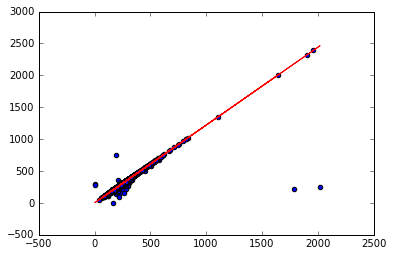

In [124]:
alkmatch = pivdata[(pivdata['Meas_Alk']>0) & (pivdata['HCO3']>0)]

x = [np.float64(i) for i in alkmatch['Meas_Alk'].values]
y = [np.float64(i) for i in alkmatch['HCO3'].values]

X = sm.add_constant(x)
res = sm.RLM(y,X).fit()
b = res.params[0]
m = res.params[1]
print m
print b

plt.figure()
plt.scatter(x,y)
plt.plot(x, res.fittedvalues, color='red')

In [125]:
def HCO3fix(x):
    if x[0]>0:
        return x[0]
    elif x[1]>0:
        return x[1]*m+b
    else:
        pass

pivdata['HCO3'] = pivdata[['HCO3','Meas_Alk']].apply(lambda x: HCO3fix(x),1)    

In [126]:
parlist = ['Ca','Mg','Na','K','Cl','HCO3','CO3','SO4','NO3','NO2','CO2','TDS','Si','Zn_tot','As_tot']

def removeInf(x):
    if x <= 0:
        return np.nan
    else:
        return np.log(x)

for i in parlist:
    if i in pivdata.columns:
        pivdata[i+'Ln'] = pivdata[i].apply(lambda x: removeInf(x),1)

d = {'Ca':0.04990269, 'Mg':0.082287595, 'Na':0.043497608, 'K':0.02557656, 'Cl':0.028206596, 'HCO3':0.016388838, 
     'CO3':0.033328223, 'SO4':0.020833333, 'NO2':0.021736513, 'NO3':0.016129032}
chemlist = ['Ca','Mg','Na','K','Cl','HCO3','CO3','SO4','NO3','NO2']

for i in chemlist:
    if i in pivdata.columns:
        pivdata[i+'Meq'] = pivdata.loc[:,i] * d[i]

pivdata.drop_duplicates(subset = ['StationId','SampleDate'], inplace=True)

In [127]:
def sumIons(x):
    b = 0
    for i in x:
        if i>0:
            b = i + b
        else:
            b = b
    return b

pivdata['Anions'] = pivdata[['ClMeq','HCO3Meq','SO4Meq','CO3Meq']].apply(lambda x: sumIons(x),1)
pivdata['Cations'] = pivdata[['KMeq','MgMeq','NaMeq','CaMeq']].apply(lambda x: sumIons(x),1)
pivdata['EC'] = pivdata['Anions'] - pivdata['Cations'] 
pivdata['CBE'] = ((pivdata['Cations']-np.abs(pivdata['Anions']))/(pivdata['Cations']+np.abs(pivdata['Anions'])))*100

# Subset Data

In [128]:
#piperdata = pivdata.dropna(subset = ['Ca','Na','Cl','Mg','SO4','HCO3'], how='any')
#piperdata.drop_duplicates(subset=['SampleId'], inplace=True)

In [129]:
print(len(pivdata))

13728


In [130]:
pivgrps = pivdata.groupby(['StationId']).median()
pivGoodData = pivdata[abs(pivdata.CBE)<=5]
pipergrps = pivGoodData.groupby(['StationId']).median()
pipergrps['sampCount'] = pivGoodData.groupby(['StationId'])['CBE'].agg({'cnt':(lambda x: np.count_nonzero(~np.isnan(x)))}).reset_index#squeeze=True

In [133]:
pivgrp = pd.merge(pivgrps, pivStats, left_index=True, right_index=True, how='left')
pipergrp = pd.merge(pipergrps, pivStats, left_index=True, right_index=True, how='left')

In [134]:
pivgrp = pivgrp.reset_index().drop_duplicates(subset=['StationId']).set_index('StationId')

In [135]:
princpiv = pivGoodData[(pivGoodData.SampleDate < datetime.datetime(2014,3,10))&(pivGoodData.UTM_X < 435000) & (pivGoodData.UTM_X > 422000) \
                   & (pivGoodData.UTM_Y > 4608000) & (pivGoodData.UTM_Y < 4634000) & (pivGoodData.StationType=='Well')]
princpiv.drop_duplicates(subset = ['SampleId'],inplace=True)

In [136]:
ResOldPrinc = resultsNoND[(resultsNoND.SampleId.isin(princpiv.SampleId))]

In [137]:
GWStat = Stat[Stat.StationType.isin(['Well','Spring'])]
GWRes = results[results.StationId.isin(list(GWStat.StationId))]

In [138]:
Nitrate = GWRes[GWRes['ParAbb'].isin(['N','NO2','NO3','NH4'])]
NitrateStat = GWStat[GWStat.StationId.isin(list(Nitrate.StationId))]

# Summarize & Plot Data

In [139]:
ParrAbbSummary = ResOldPrinc.groupby('ParAbb')['ResValue'].agg({'min':np.min, 'mean':np.mean,
                                                                'qrt5':(lambda x: np.percentile(x,q=5)),
                                                                'qrt95':(lambda x: np.percentile(x,q=95)),
                                                                'range':(lambda x: np.max(x)-np.min(x)),   
                                                                'lqrt':(lambda x: np.percentile(x,q=25)),
                                                                   'median':np.median, 
                                                                   'uqrt':(lambda x: np.percentile(x,q=75)), 
                                                                   'max':np.max, 'std':np.std, 
                                                                   'cnt':(lambda x: np.count_nonzero(~np.isnan(x)))}).reset_index()

In [140]:
ParrAbbSummary

,ParAbb,qrt95,max,uqrt,std,cnt,min,median,range,qrt5,lqrt,mean
0,18O,-16.308000,-16.260000,-16.500000,0.286217,5,-16.940000,-16.740000,0.680000,-16.932000,-16.900000,-16.668000
1,2H,-126.000000,-126.000000,-126.000000,1.949359,5,-130.000000,-126.000000,4.000000,-129.800000,-129.000000,-127.400000
2,Ag_diss,0.002000,0.002000,0.002000,0.000000,2,0.002000,0.002000,0.000000,0.002000,0.002000,0.002000
3,Ag_tot,0.004400,0.010000,0.002000,0.002438,15,-0.000058,0.002000,0.010058,-0.000056,0.000473,0.001785
4,Al_tot,0.306000,0.480000,0.100000,0.138517,13,-0.012400,0.010000,0.492400,-0.012160,-0.006300,0.070623
5,As_diss,0.006700,0.007000,0.005500,0.004243,2,0.001000,0.004000,0.006000,0.001300,0.002500,0.004000
6,As_tot,0.010000,0.023500,0.001725,0.004079,122,0.000000,0.000615,0.023500,0.000000,0.000000,0.002073
7,B,0.207750,0.800000,0.103750,0.122519,70,0.000000,0.040000,0.800000,0.000053,0.020000,0.082189
8,Ba,0.194000,0.270000,0.125400,0.075610,33,0.000050,0.050000,0.269950,0.000050,0.000090,0.071357
9,Be,-0.000012,-0.000012,-0.000012,0.000001,4,-0.000015,-0.000013,0.000003,-0.000015,-0.000013,-0.000013


In [141]:
manyPars = list(ParrAbbSummary[ParrAbbSummary['cnt'] >= 30]['ParAbb'])

In [142]:
ResOldPrinc = ResOldPrinc[ResOldPrinc['ParAbb'].isin(manyPars)] 
summaryStats = ParrAbbSummary[ParrAbbSummary['ParAbb'].isin(manyPars)]

In [143]:
summaryStats

,ParAbb,qrt95,max,uqrt,std,cnt,min,median,range,qrt5,lqrt,mean
6,As_tot,0.010000,0.023500,0.001725,0.004079,122,0.000000,0.000615,0.023500,0.000000,0.000000,0.002073
7,B,0.207750,0.800000,0.103750,0.122519,70,0.000000,0.040000,0.800000,0.000053,0.020000,0.082189
8,Ba,0.194000,0.270000,0.125400,0.075610,33,0.000050,0.050000,0.269950,0.000050,0.000090,0.071357
10,Br,0.060800,0.072000,0.024000,0.014534,37,0.012000,0.020000,0.060000,0.013000,0.016000,0.024622
11,CO2,190.000000,234.000000,18.250000,48.196493,180,0.000000,9.000000,234.000000,1.860000,4.950000,24.850556
12,CO3,2.300000,12.000000,1.000000,1.946735,58,0.000000,0.000000,12.000000,0.000000,0.000000,0.706897
13,Ca,81.735000,225.000000,65.900000,19.116112,214,23.000000,55.000000,202.000000,37.000000,46.000000,57.149327
16,Cl,50.700000,475.000000,15.950000,65.534579,214,0.000000,9.465000,475.000000,3.895000,7.025000,26.257299
18,Cond,744.000000,1710.000000,560.750000,197.018454,190,280.000000,495.500000,1430.000000,381.750000,450.500000,541.826316
19,Cr_VI_diss,0.005000,0.006000,0.003000,0.002046,66,0.000000,0.000000,0.006000,0.000000,0.000000,0.001424


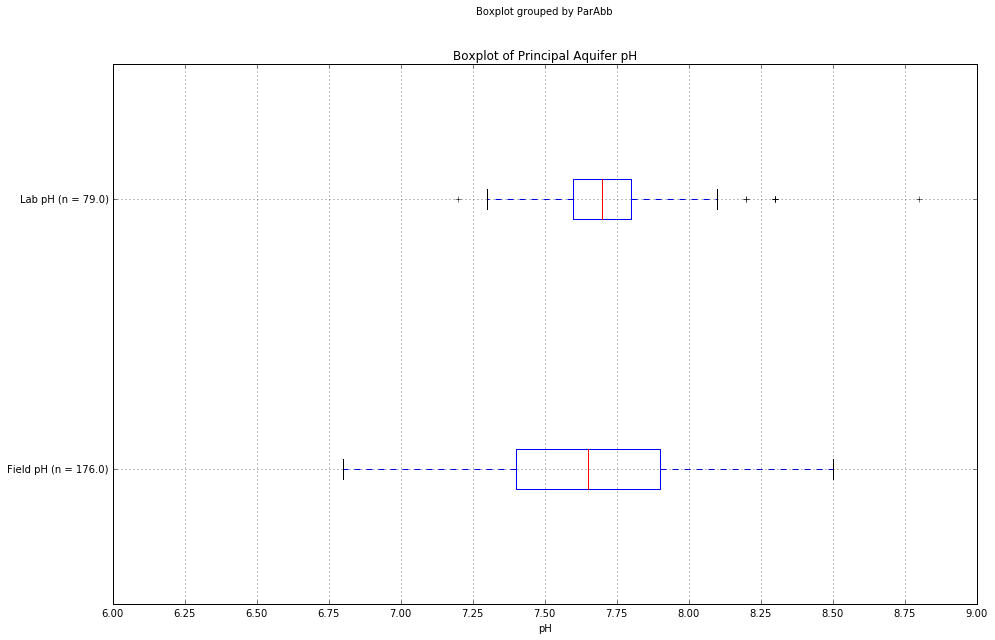

In [144]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10


parLabCounts = ParrAbbSummary.reset_index()
parLabCounts = parLabCounts.set_index(['ParAbb'])
plt.figure()
boxres= ResOldPrinc[ResOldPrinc['ParAbb'].isin(['pH_lab','pH_field'])] 
boxres.boxplot(column='ResValue', by='ParAbb',vert=False)

plt.title('Boxplot of Principal Aquifer pH')
plt.yticks([1,2],['Field pH (n = %s)'%(parLabCounts.loc['pH_field','cnt']),'Lab pH (n = %s)'%(parLabCounts.loc['pH_lab','cnt'])])
plt.xlim(6,9)
plt.xticks(np.arange(6,9.25,0.25))
plt.xlabel('pH')
plt.savefig(rootname+"pHBoxplot.svg")
plt.savefig(rootname+"pHBoxplot.pdf")

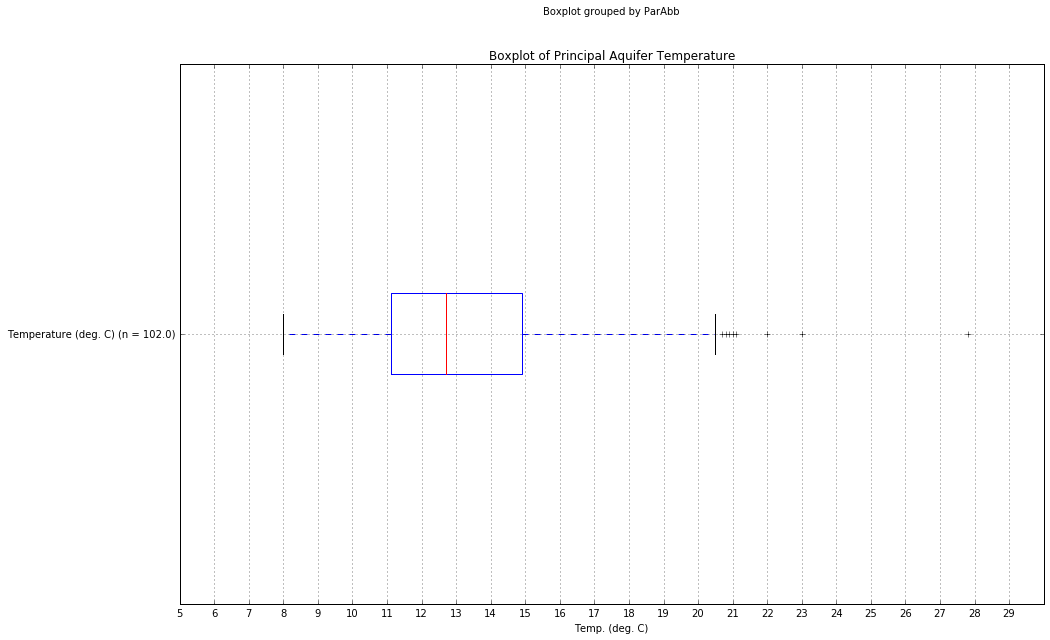

In [145]:
plt.figure()
boxres= ResOldPrinc[ResOldPrinc['ParAbb'].isin(['Temp'])] 
boxres.boxplot(column='ResValue', by='ParAbb',vert=False)

plt.title('Boxplot of Principal Aquifer Temperature')
plt.yticks([1],['Temperature (deg. C) (n = %s)'%(parLabCounts.loc['Temp','cnt'])])
plt.xticks(np.arange(5,30,1))
plt.xlabel('Temp. (deg. C)')
plt.savefig(rootname+"pHBoxplot.pdf")

c:\python27\arcgis10.3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


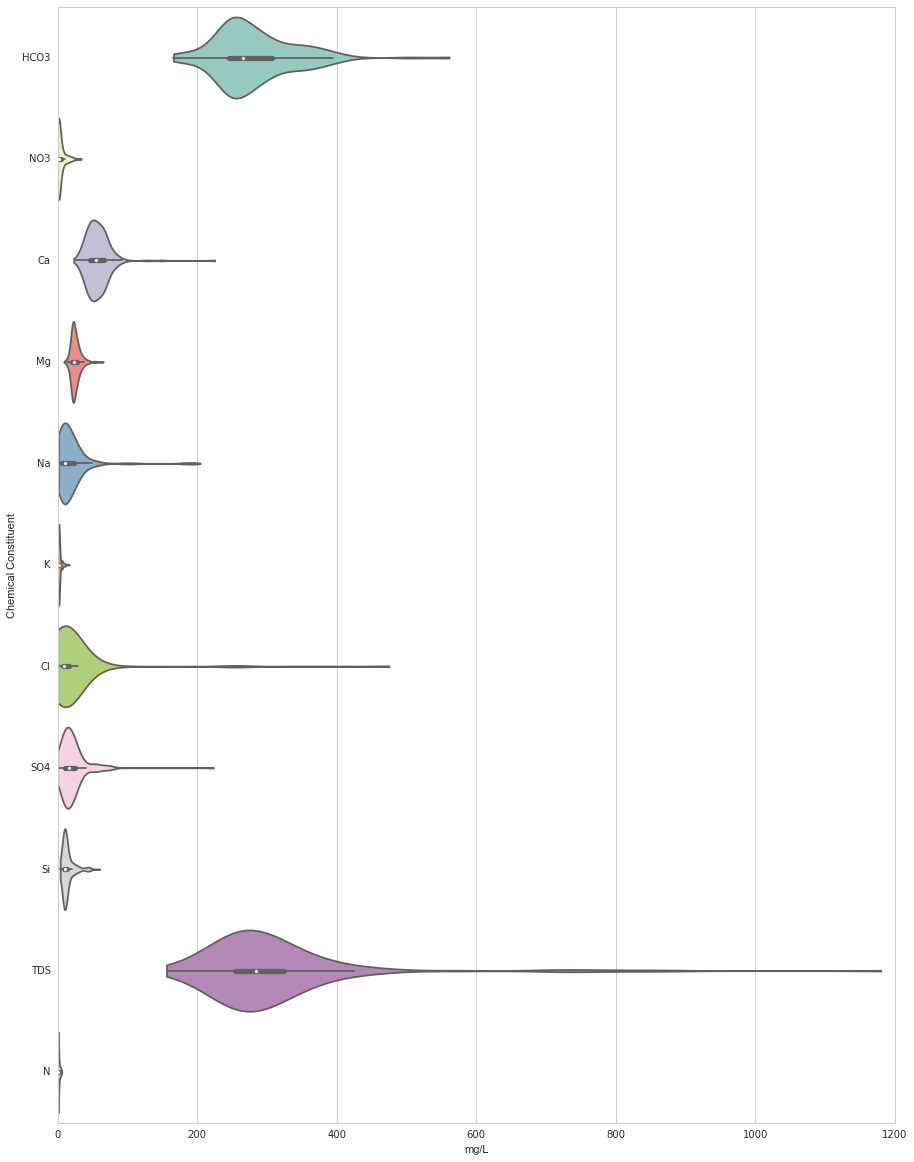

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
rcParams['figure.figsize'] = 15, 20


parLabCounts = ParrAbbSummary.reset_index()
parLabCounts = parLabCounts.set_index(['ParAbb'])

parlist = ['Mg','Ca','Na','Cl','SO4','HCO3','Si','K','NO3','TDS','N']
boxres = ResOldPrinc[ResOldPrinc['ParAbb'].isin(parlist)] 
plt.figure()
sns.violinplot(x="ResValue", y='ParAbb', data=boxres, palette="Set3", scale='width', cut=0)
plt.xlabel('mg/L')
plt.xlim(0,1200)
plt.ylabel('Chemical Constituent')
plt.savefig(rootname+'violinMajor.pdf')

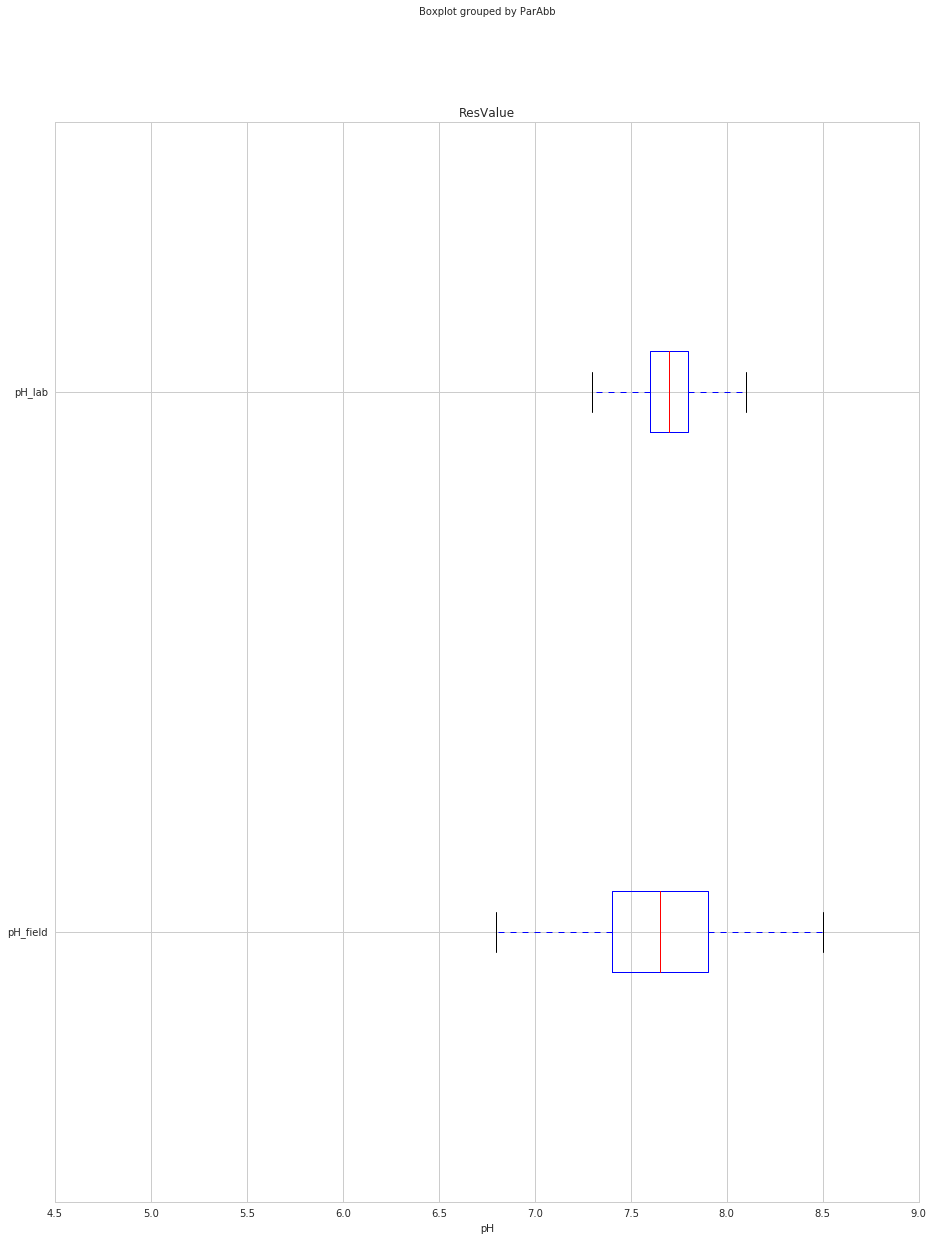

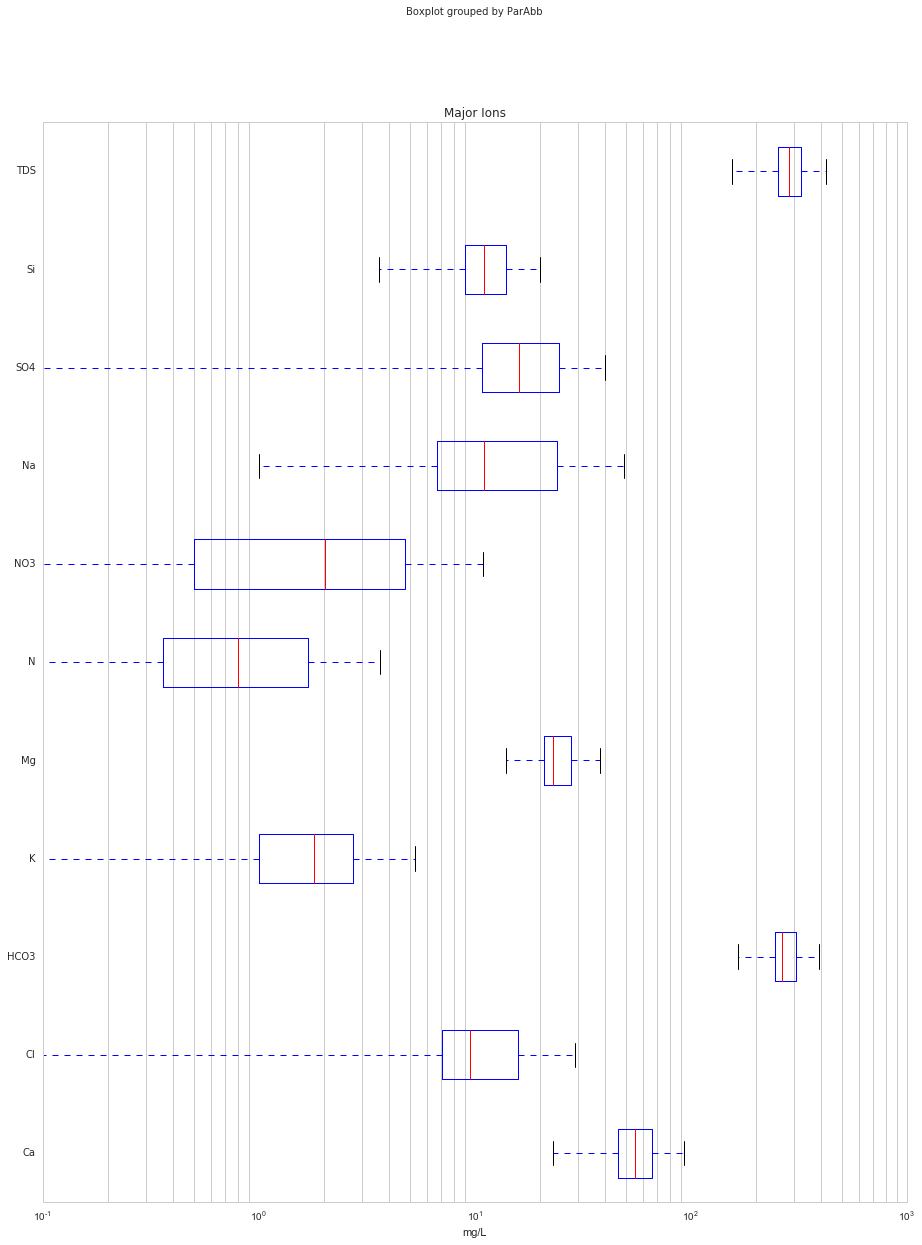

In [147]:
parLabCounts = ParrAbbSummary.reset_index()
parLabCounts = parLabCounts.set_index(['ParAbb'])


def parboxplot(parlist):
    plt.figure()
    boxres= ResOldPrinc[ResOldPrinc['ParAbb'].isin(parlist)] 
    boxres.boxplot(column='ResValue', by='ParAbb',vert=False)
    #labs = [str(parlist[i]) + " (n= %s)"%(parLabCounts.loc[parlist[i],'cnt']) for i in range(len(parlist))]
    #tickloc = [b+1 for b in range(len(parlist))]
    #plt.yticks(tickloc,labs)
    

parlist = ['pH_lab','pH_field']
parboxplot(parlist)
plt.xlabel('pH')
plt.savefig(rootname+'pHBoxplot')

parlist = ['Mg','Ca','Na','Cl','SO4','HCO3','Si','K','NO3','TDS','N']
parboxplot(parlist)
plt.title('Major Ions')
plt.xlabel('mg/L')
plt.grid(which='both',axis='both')
plt.xscale('log')
plt.xlim(0.1,1000)

plt.savefig(rootname+'MajorIonsBoxplot.pdf')

#plt.xlim(0.00001,1000)
#plt.xscale('log')

# Export data 

In [ ]:
pipergrps.to_csv(rootname+'avgpiper.csv',index_label='StationId')
pivdata.to_csv(rootname+'pivotdata.csv',index_label='OBJECTID')
princpiv.to_csv(rootname+'PrincAquiferData.csv',index_label='OBJECTID')
pivgrp.to_csv(rootname+'pivgrps.csv',index_label='StationId')

In [ ]:
Nitrate.to_csv(rootname+'NitrateResults.csv')
NitrateStat.to_csv(rootname+'NitrateStations.csv')

In [ ]:
summaryStats.to_csv(rootname+'PrincAquifStats.csv')

In [ ]:
summaryStats.to_clipboard()

In [ ]:
GWStat.to_csv(rootname+'GWStations.csv',index_label='ObjectID')
GWRes.to_csv(rootname+'GWResults.csv',index_label='ObjectID')

In [ ]:
writer = pd.ExcelWriter(rootname + "combined_out.xlsx", engine="xlsxwriter")
Stat.to_excel(writer, "stations", index=False)
results.to_excel(writer, "results", index=False)
GWStat.to_excel(writer, 'GWStations',index=False)
GWRes.to_excel(writer, 'GWResults',index=False)
pipergrps.to_excel(writer,'avgpiper')
pivdata.to_excel(writer,'pivotdata')
summaryStats.to_excel(writer,'princaquifstats')
writer.save()